In [10]:
from src.ManuallySelectedFeatureSet import ManuallySelectedFeatureSet
from src.model_runner import ModelRunner
from src.uci_har_dataset import UciHarDataset
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loaded activity labels from data/UCI-HAR Dataset//activity_labels.txt
{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}
Loaded feature names from data/UCI-HAR Dataset//features.txt
Loaded features from data/UCI-HAR Dataset/train/X_train.txt. Shape: (7352, 561)
Loaded labels from data/UCI-HAR Dataset/train/y_train.txt. Shape: (7352, 1)
Loaded features from data/UCI-HAR Dataset/test/X_test.txt. Shape: (2947, 561)
Loaded labels from data/UCI-HAR Dataset/test/y_test.txt. Shape: (2947, 1)
Split: (5881, 561) - (5881, 1) - (1471, 561) - (1471, 1)
Selected features: train. Shape: (5881, 15)
Selected features: val. Shape: (1471, 15)
Selected features: test. Shape: (2947, 15)
Scaled features using StandardScaler.
Accuracy on Model: 0.9436

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.98      0.96      0.97       247
  WALKING_UPSTAIRS       0.92      0.96      0.94       200
W

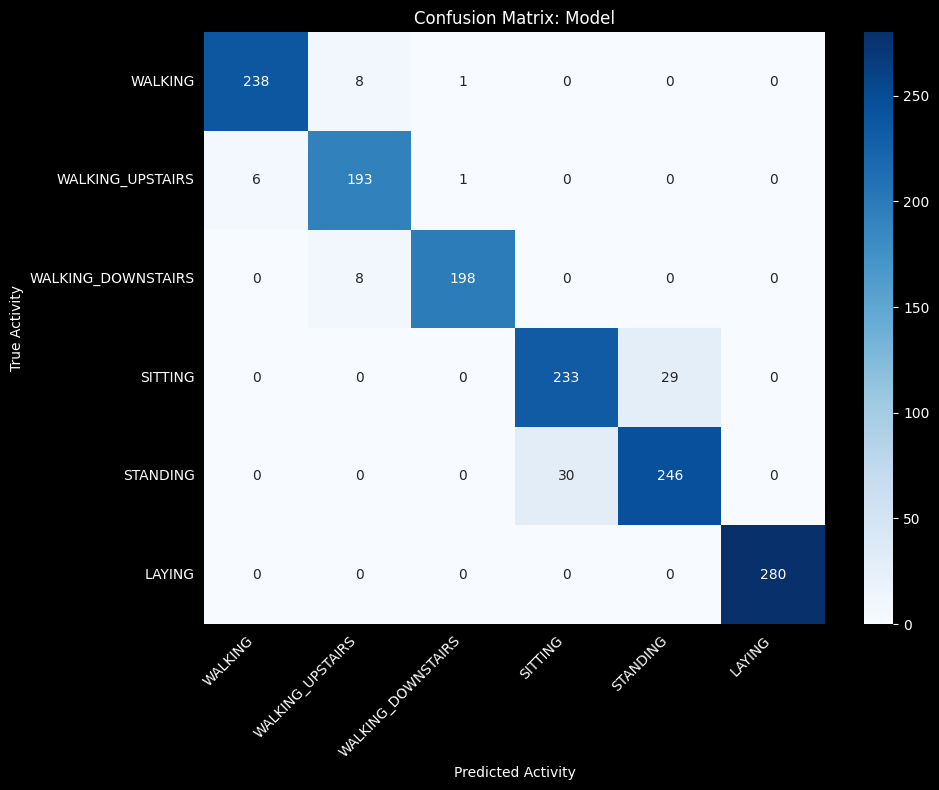

In [13]:


dataset = UciHarDataset()
manual_features = ManuallySelectedFeatureSet(dataset)
svm = SVC(kernel='rbf', C=1.0, gamma='scale')

runner = ModelRunner(dataset, feature_set=manual_features, model=svm)
runner.run()

runner.plot_confusion_matrix()


Calculating feature importance for Model...


<string>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



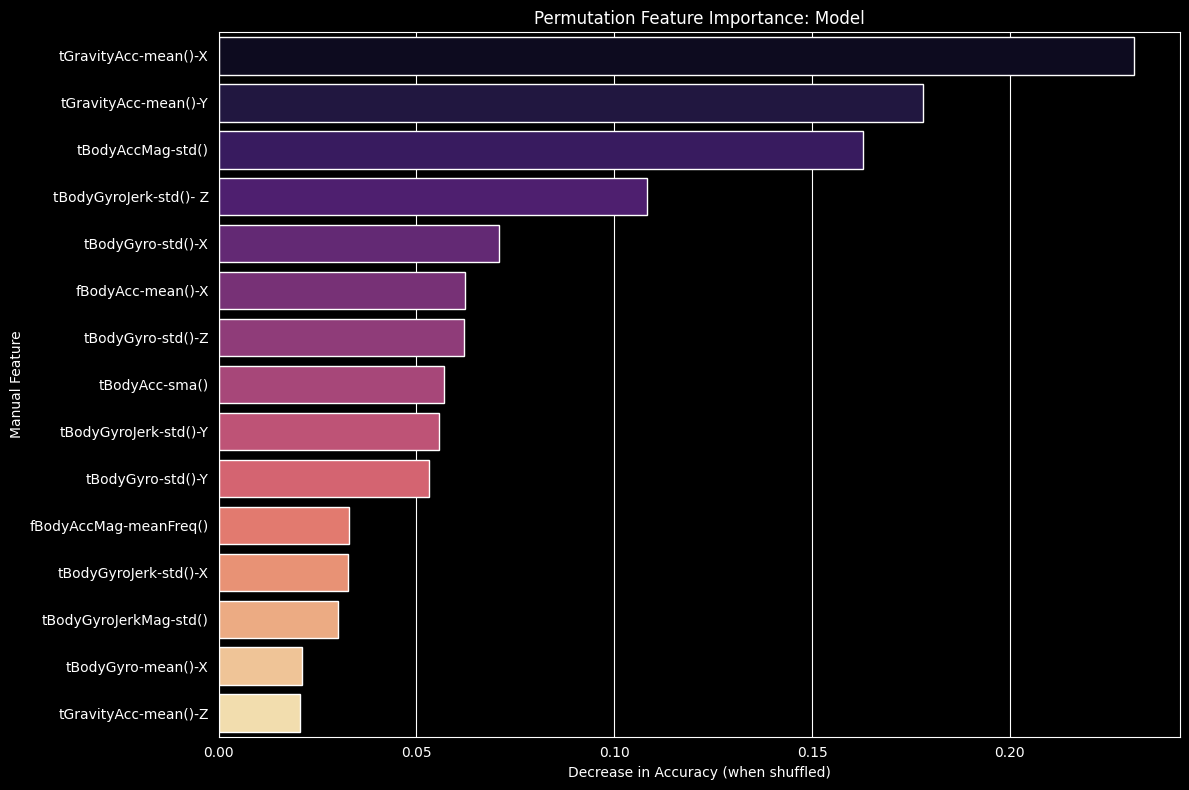

,Feature,Importance,Std
0,tGravityAcc-mean()-X,0.231407,0.007900
1,tGravityAcc-mean()-Y,0.177906,0.008615
4,tBodyAccMag-std(),0.162814,0.006218
7,tBodyGyroJerk-std()- Z,0.108294,0.004278
11,tBodyGyro-std()-X,0.070904,0.003427
9,fBodyAcc-mean()-X,0.062339,0.004375
13,tBodyGyro-std()-Z,0.062135,0.004913
3,tBodyAcc-sma(),0.056900,0.003494
6,tBodyGyroJerk-std()-Y,0.055608,0.004834
12,tBodyGyro-std()-Y,0.053297,0.004653


In [14]:
runner.plot_feature_importance()